# Documentation

**Spencer Ressel**

**2023.06.14**

This code is designed to numerically solve the linearized governing equations of Ahmed (2021).

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.animation import FuncAnimation

# Constants

In [2]:
GRAVITY = 9.81
EQUIVALENT_DEPTH = 250
CORIOLIS_PARAMETER = 2.29e-11

dry_gravity_phase_speed = np.sqrt(GRAVITY*EQUIVALENT_DEPTH)

time_scale = (2*CORIOLIS_PARAMETER*dry_gravity_phase_speed)**(-1/2)
length_scale = (dry_gravity_phase_speed/(2*CORIOLIS_PARAMETER))**(1/2)

# Setup

In [3]:

cfl = 0.2
x_length = 1.25e7
y_length = 5e6
time_length = 5e6
x_step = 2e5
y_step = 2e5

time_step = int(cfl*x_step/dry_gravity_phase_speed)

In [4]:
time_span = np.arange(0, time_length+time_step, time_step)
x_grid = np.arange(-x_length+(x_length/5), x_length+(x_length/5), x_step)
y_grid = np.arange(-y_length, y_length, y_step)

In [5]:
nt = len(time_span)
nx = len(x_grid)
ny = len(y_grid)

In [112]:
alpha = 1
print(f"CFL Number: {(alpha*time_step/x_step)}")
if (alpha*time_step/x_step) > 1:
    print("CFL Number greater than 1, scheme unstable!")

u = np.zeros((nt,ny,nx))
v = np.zeros((nt,ny,nx))
T = np.zeros((nt,ny,nx))
q = np.zeros((nt,ny,nx))

u[0,:,:] = np.einsum(
    'i,j->ij',
    np.exp(-y_grid**2/(4*length_scale**2)),
    np.exp(-(x_grid+6e6)**2/(4*length_scale**2))
)

v[0,:,:] = np.einsum(
    'i,j->ij',
    np.exp(-y_grid**2/(4*length_scale**2)),
    np.exp(-x_grid**2/(4*length_scale**2))
)

T[0,:,:] = np.einsum(
    'i,j->ij',
    np.exp(-y_grid**2/(4*length_scale**2)),
    np.exp(-x_grid**2/(4*length_scale**2))
)

for t in range(nt-1):
    for i in range(nx):
        if (i != (nx-1)) and (i != 0):
            u[t+1,:,i] = u[t,:, i] - (alpha*time_step/(2*x_step))*(u[t,:,i+1] - u[t,:,i-1])
        
        elif i == 0:
            u[t+1,:,0] = u[t,:, 0] - (alpha*time_step/(2*x_step))*(u[t,:,1] - u[t,:,-1])
        
        elif i == (nx-1):
            u[t+1,:,-1] = u[t,:, -1] - (alpha*time_step/(2*x_step))*(u[t,:,0] - u[t,:,-2])

CFL Number: 0.004035


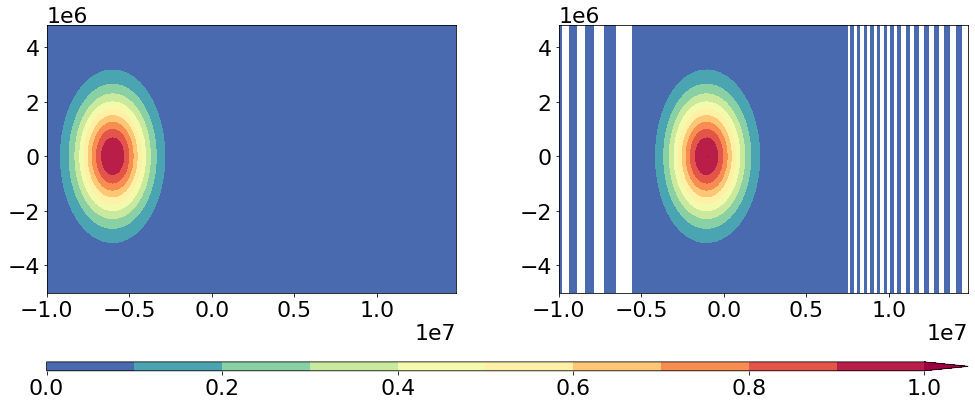

In [113]:
plt.rcParams.update({'font.size':22})
fig = plt.figure(figsize=(16,6))
gs = GridSpec(2, 2, figure=fig, height_ratios=[30,1])
gs.update(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.25, hspace=0.5)


ax0 = fig.add_subplot(gs[0,0])
cbar_ax0 = fig.add_subplot(gs[1,:])

im0 = ax0.contourf(
    x_grid,
    y_grid,
    u[0,:,:],
    levels = np.linspace(0, 1, 11),
    extend='max',
    cmap='Spectral_r'
)
cbar0 = fig.colorbar(im0, cax=cbar_ax0, orientation='horizontal')
ax0.set_aspect('auto')

ax1 = fig.add_subplot(gs[0,1])

im1 = ax1.contourf(
    x_grid,
    y_grid,
    u[-1,:,:],
    levels = np.linspace(0, 1, 11),
    extend='max',
    cmap='Spectral_r'
)
# cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal')
ax1.set_aspect('auto')


plt.show()

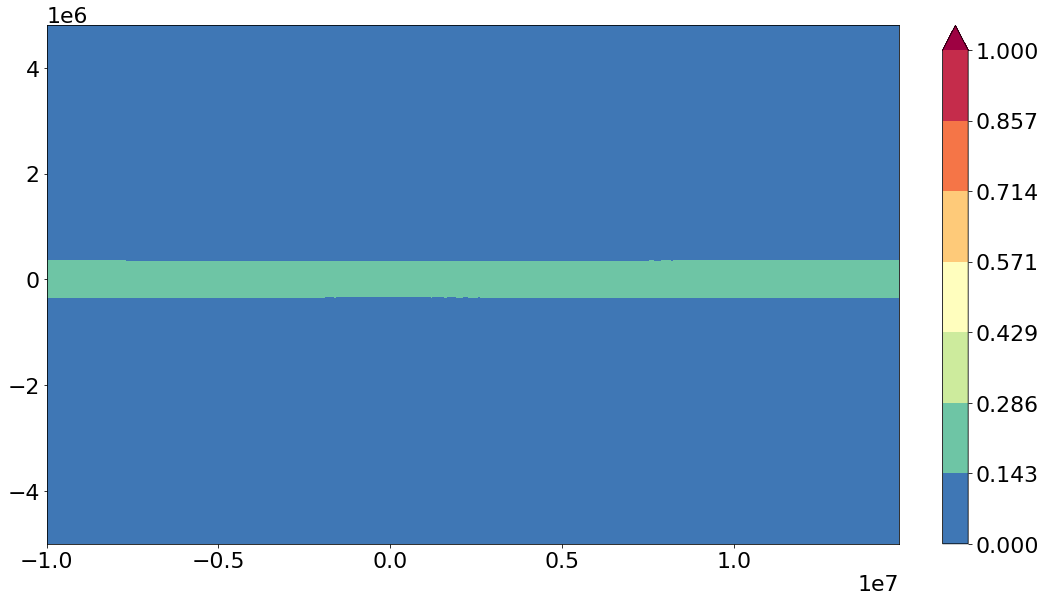

In [101]:
fig = plt.figure(figsize=(16,9))
gs = GridSpec(1, 2, width_ratios = [100,3], figure=fig)
gs.update(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1)

ax = fig.add_subplot(gs[0])
cbar_ax = fig.add_subplot(gs[1])

cont = ax.contourf(
    x_grid,
    y_grid,
    u[0,:,:],
    levels=np.linspace(0,1,8),
    extend='max',
    cmap='Spectral_r'
)
cbar = fig.colorbar(cont, cax=cbar_ax)
ax.set_aspect('auto')

def update(frame):
    
    cont = ax.contourf(
        x_grid,
        y_grid,
        u[250*frame,:,:],
        levels=np.linspace(0,1,8),
        extend='max',
        cmap='Spectral_r'
    )
    # cbar = fig.colorbar(cont, cax=cbar_ax)
    ax.set_aspect('auto')

    return cont, cbar,

anim = FuncAnimation(fig, update, frames=24, interval=200)

anim.save('test.gif', dpi=100)